In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
print(iris.head(),"\n")
print(iris.tail(),"\n")
print(iris.info(),"\n")
print(iris.describe(),"\n")

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa 

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  

In [4]:
iris.drop('Id',axis=1, inplace=True)

In [6]:
def clean_species(data):
    if data == "Iris-setosa":
        return "setosa"
    elif data == "Iris-versicolor":
        return "versicolor"
    else:
        return "virginica"

In [7]:
iris["Species"] = iris["Species"].apply(clean_species)

In [9]:
iris["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

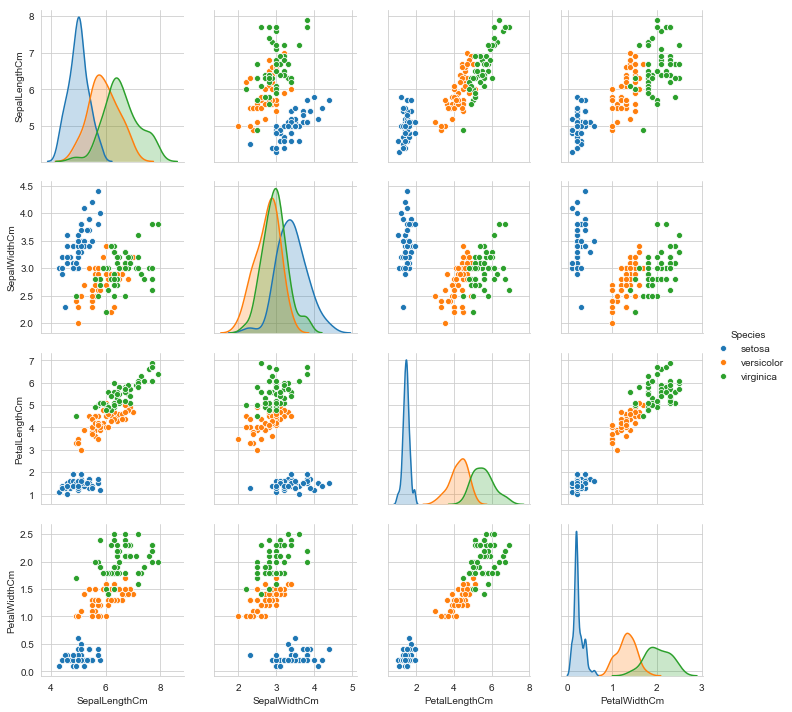

In [10]:
sns.pairplot(iris, hue="Species")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023434DCCB00>,
      dtype=object)

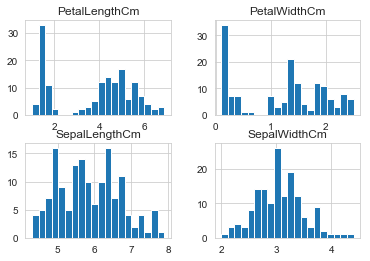

In [11]:
iris.hist(bins=20)

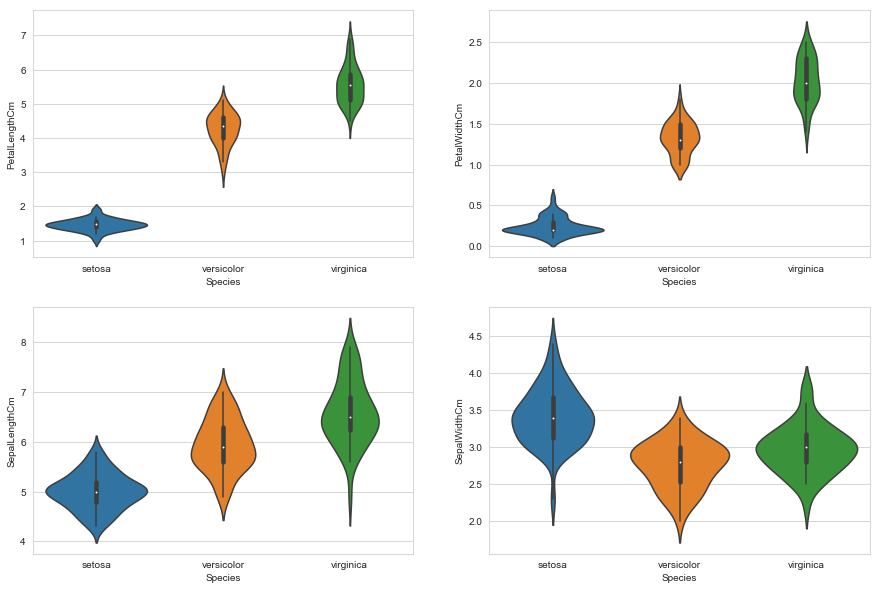

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [15]:
from sklearn.linear_model import LogisticRegression # For using Logistic Regression Algorithm
from sklearn.neighbors import KNeighborsClassifier # For K Nearest Neighbors Algorithm
from sklearn import svm # For using Support Vector Machine Algorithm
from sklearn.tree import DecisionTreeClassifier # For using Decision Tree Algorithm

from sklearn import metrics # For checking the model accuracy
from sklearn.model_selection import train_test_split

In [16]:
iris.shape

(150, 5)

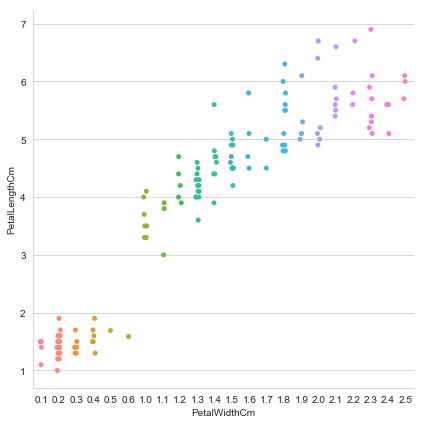

In [132]:
sns.catplot("PetalWidthCm", "PetalLengthCm", data=iris, height=6)

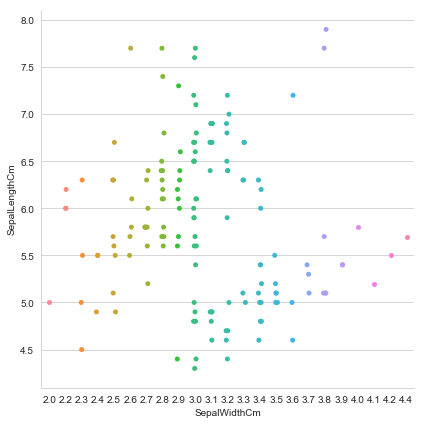

In [131]:
sns.catplot("SepalWidthCm", "SepalLengthCm", data=iris, height=6)

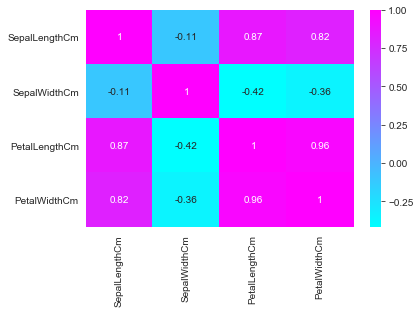

In [17]:
sns.heatmap(iris.corr(), annot=True, cmap="cool")

In [40]:
#X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
X = iris.iloc[:,:4]
Y = iris.Species
print(X.head())
print(Y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [43]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(105, 4) (45, 4) (105,) (45,)


### Support Vector Machine (SVM)

In [49]:
model = svm.SVC(gamma="auto") # Select the algorithm
model.fit(X_train, Y_train) # Train the algorith with the training data and training output
prediction = model.predict(X_test) # Pass the testing data to the trained algorithm
print("The accuracy of the SVM model is:", metrics.accuracy_score(Y_test,prediction)) # Check the accuracy of the algorithm
# Pass the predicted output by the model and the actual output

The accuracy of the SVM model is: 0.9777777777777777


## Logistic Regression

In [59]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X_train, Y_train) # Train the algorith with the training data and training output
prediction = model.predict(X_test) # Pass the testing data to the trained algorithm
print("The accuracy of the Logistic Regression model is:", metrics.accuracy_score(Y_test,prediction)) # Check the accuracy of the algorithm
# Pass the predicted output by the model and the actual output

The accuracy of the Logistic Regression model is: 0.9777777777777777


## Decision Tree

In [60]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train) # Train the algorith with the training data and training output
prediction = model.predict(X_test) # Pass the testing data to the trained algorithm
print("The accuracy of the Decision Tree model is:", metrics.accuracy_score(Y_test,prediction)) # Check the accuracy of the algorithm
# Pass the predicted output by the model and the actual output

The accuracy of the Decision Tree model is: 0.9777777777777777


## K-Nearest Neighbours

([<matplotlib.axis.XTick at 0x2343a568a90>,
 <a list of 10 Text xticklabel objects>)

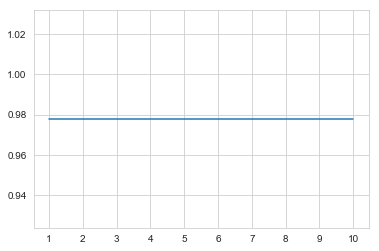

In [80]:
a_index = list(range(1,11))
a = []
x = [1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,Y_train)
    prediction=model.predict(X_test)
    a.append(metrics.accuracy_score(Y_test,prediction))
plt.plot(a_index, a)
plt.xticks(x)

In [81]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train) # Train the algorith with the training data and training output
prediction = model.predict(X_test) # Pass the testing data to the trained algorithm
print("The accuracy of the K Nearest Neighbours model is:", metrics.accuracy_score(Y_test,prediction)) # Check the accuracy of the algorithm
# Pass the predicted output by the model and the actual output

The accuracy of the K Nearest Neighbours model is: 0.9777777777777777


## Creating Petals And Sepals Training Data

In [93]:
petals = iris.iloc[:,2:4]
sepals = iris.iloc[:,:2]
print(petals.head())
print(sepals.head())

   PetalLengthCm  PetalWidthCm
0            1.4           0.2
1            1.4           0.2
2            1.3           0.2
3            1.5           0.2
4            1.4           0.2
   SepalLengthCm  SepalWidthCm
0            5.1           3.5
1            4.9           3.0
2            4.7           3.2
3            4.6           3.1
4            5.0           3.6


In [98]:
X_train_s, X_test_s, Y_train, Y_test = train_test_split(sepals, Y, test_size=0.3, random_state=0) # Splitting data for sepals
X_train_p, X_test_p, Y_train, Y_test = train_test_split(petals, Y, test_size=0.3, random_state=0) # Splitting data for petals

## Support Vector Machine (SVM)

In [99]:
# Sepals
model = svm.SVC(gamma="auto") # Select the algorithm
model.fit(X_train_s, Y_train) # Train the algorith with the training data and training output
prediction = model.predict(X_test_s) # Pass the testing data to the trained algorithm
print("The accuracy of the SVM model for Sepals is:", metrics.accuracy_score(Y_test,prediction)) # Check the accuracy of the algorithm
# Pass the predicted output by the model and the actual output

# Petals
model = svm.SVC(gamma="auto") # Select the algorithm
model.fit(X_train_p, Y_train) # Train the algorith with the training data and training output
prediction = model.predict(X_test_p) # Pass the testing data to the trained algorithm
print("The accuracy of the SVM model for Petals is:", metrics.accuracy_score(Y_test,prediction)) # Check the accuracy of the algorithm
# Pass the predicted output by the model and the actual output

The accuracy of the SVM model for Sepals is: 0.8
The accuracy of the SVM model for Petals is: 0.9777777777777777


## Logistic Regression

In [100]:
# Sepals
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X_train_s, Y_train) # Train the algorith with the training data and training output
prediction = model.predict(X_test_s) # Pass the testing data to the trained algorithm
print("The accuracy of the Logistic Regression model for Sepals is:", metrics.accuracy_score(Y_test,prediction)) # Check the accuracy of the algorithm
# Pass the predicted output by the model and the actual output

# Petals
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X_train_p, Y_train) # Train the algorith with the training data and training output
prediction = model.predict(X_test_p) # Pass the testing data to the trained algorithm
print("The accuracy of the Logistic Regression model for Petals is:", metrics.accuracy_score(Y_test,prediction)) # Check the accuracy of the algorithm
# Pass the predicted output by the model and the actual output

The accuracy of the Logistic Regression model for Sepals is: 0.8222222222222222
The accuracy of the Logistic Regression model for Petals is: 0.9777777777777777


## Decision Tree Classifier

In [101]:
# Sepals
model = DecisionTreeClassifier()
model.fit(X_train_s, Y_train) # Train the algorith with the training data and training output
prediction = model.predict(X_test_s) # Pass the testing data to the trained algorithm
print("The accuracy of the Decision Tree Classifier model for Sepals is:", metrics.accuracy_score(Y_test,prediction)) # Check the accuracy of the algorithm
# Pass the predicted output by the model and the actual output

# Petals
model = DecisionTreeClassifier()
model.fit(X_train_p, Y_train) # Train the algorith with the training data and training output
prediction = model.predict(X_test_p) # Pass the testing data to the trained algorithm
print("The accuracy of the Decision Tree Classifier model for Petals is:", metrics.accuracy_score(Y_test,prediction)) # Check the accuracy of the algorithm
# Pass the predicted output by the model and the actual output

The accuracy of the Decision Tree Classifier model for Sepals is: 0.6444444444444445
The accuracy of the Decision Tree Classifier model for Petals is: 0.9555555555555556


## K Nearest Neighbors

In [102]:
# Sepals
model = KNeighborsClassifier()
model.fit(X_train_s, Y_train) # Train the algorith with the training data and training output
prediction = model.predict(X_test_s) # Pass the testing data to the trained algorithm
print("The accuracy of the K Nearest Neighbors model for Sepals is:", metrics.accuracy_score(Y_test,prediction)) # Check the accuracy of the algorithm
# Pass the predicted output by the model and the actual output

# Petals
model = KNeighborsClassifier()
model.fit(X_train_p, Y_train) # Train the algorith with the training data and training output
prediction = model.predict(X_test_p) # Pass the testing data to the trained algorithm
print("The accuracy of the K Nearest Neighbors model for Petals is:", metrics.accuracy_score(Y_test,prediction)) # Check the accuracy of the algorithm
# Pass the predicted output by the model and the actual output

The accuracy of the K Nearest Neighbors model for Sepals is: 0.7333333333333333
The accuracy of the K Nearest Neighbors model for Petals is: 0.9777777777777777
